In [1]:
from tensorflow.keras.datasets import reuters

Cargamos un conjunto de datos de Noticias y sus tópicos asociados (data set de texto). Existen 46 diferentes tipos de tópicos. 
El parámetro ```num_words``` restringe la data a las 15000 palabras más frecuentes (desconozco el máximo para este dataset). Observemos los datos: 

In [2]:
num_words = 10000

In [3]:
(train_data,train_labels),(test_data,test_labels) = reuters.load_data(num_words = num_words)

In [4]:
print("Cantidad de ejemplos de entrenamiento:", len(train_data))

Cantidad de ejemplos de entrenamiento: 8982


In [5]:
print("Cantidad de ejemplos de test:", len(test_data))

Cantidad de ejemplos de test: 2246


Cada ejemplo es una lista de números enteros, que representan una palabra de un índice de palabras. 

In [6]:
train_data[0]

[1,
 2,
 2,
 8,
 43,
 10,
 447,
 5,
 25,
 207,
 270,
 5,
 3095,
 111,
 16,
 369,
 186,
 90,
 67,
 7,
 89,
 5,
 19,
 102,
 6,
 19,
 124,
 15,
 90,
 67,
 84,
 22,
 482,
 26,
 7,
 48,
 4,
 49,
 8,
 864,
 39,
 209,
 154,
 6,
 151,
 6,
 83,
 11,
 15,
 22,
 155,
 11,
 15,
 7,
 48,
 9,
 4579,
 1005,
 504,
 6,
 258,
 6,
 272,
 11,
 15,
 22,
 134,
 44,
 11,
 15,
 16,
 8,
 197,
 1245,
 90,
 67,
 52,
 29,
 209,
 30,
 32,
 132,
 6,
 109,
 15,
 17,
 12]

Existe una forma de conocer la palabra asociada (Decodificador)

In [7]:
def decoder(reuters, sample_number = 0):
    word_index = reuters.get_word_index()
    reverse_word_index = dict([(value,key) for (key,value) in word_index.items()])
    # las posiciones 0,1 y 2 estan reservadas para padding, start of sequence y unknown por eso i-3
    decoded_newswire = " ".join([reverse_word_index.get(i-3,"?") for i in train_data[sample_number]])
    print("Decoded message: ", decoded_newswire)

In [8]:
decoder(reuters, sample_number = 20)

Decoded message:  ? leading u s farm state senators are seeking to ? into the ? ? trade bill a provision that would broaden eligibility requirements under the u s agriculture department's export enhancement program eep to include traditional buyers of u s farm products including the soviet union senate staff said under existing criteria usda can offer eep subsidies to ? export markets lost to competing nations' unfair trading practices senate agriculture committee chairman patrick leahy d vt is leading a group of farm state senators in an effort to broaden the criteria in such a way as to enable moscow to be eligible for the subsidies sources said the senators including senate finance committee chairman lloyd bentsen d tex max ? d ? david ? d ? john ? d ? and ? ? r miss also may ? into the trade bill a measure to shield pork producers and processors from canadian imports the measure sponsored by sen charles ? r iowa would clarify the definition of industry in determining whether or not

In [9]:
train_labels[1]

4

Preparando la data


Todas las listas de palabras serán de tamaño diferente. Es necesario convertir nuestras listas de números enteros en vectores de un mismo tamaño. 
Para eso creamos un arreglo de ceros del tamaño de la cantidad de ejemplos $\times$ la cantidad de palabras que estamos manejando, en este caso 15000. 
En Inglés esto se denomina "Encoding". 

In [10]:
import numpy as np 

def vectorize_sequences(sequences, dimension = int(num_words)):
    results = np.zeros((len(sequences),dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i,j] = 1. #coloco un 1 en el numero de componente que representara al numero de la palabra
    return results

In [11]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

Otro Encoding necesario es el que utilizaremos para las clases

In [12]:
def to_one_hot(labels,dimension=46):
    results = np.zeros((len(labels),dimension))
    for i, label in enumerate(labels):
        results[i,label]=1.
    return results

In [13]:
y_train = to_one_hot(train_labels)

In [14]:
y_test = to_one_hot(test_labels)

### Construimos el modelo

In [15]:
import keras

In [16]:
model = keras.Sequential([
    keras.layers.Dense(64,activation="relu"),
    keras.layers.Dense(64,activation="relu"),
    keras.layers.Dense(46,activation="softmax"),    #debe coincidir con el número de clases
])

Categorical Cross Entropy Loss

$
E = -\displaystyle \sum_{i} t_i \text{log}\left(\dfrac{e^{S_{p}}}{\displaystyle \sum_{j} e^{S_{j}}}\right)
$

In [17]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy", # sustituir softmax dentro de la definicion de entropía
              metrics=["accuracy"])

Validacion

In [18]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

Entrenamos

In [19]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (x_val,y_val))

Epoch 1/20
16/16 [==============================] - 0s 13ms/step - loss: 2.6723 - accuracy: 0.4697 - val_loss: 1.7918 - val_accuracy: 0.6420
Epoch 2/20
16/16 [==============================] - 0s 8ms/step - loss: 1.4495 - accuracy: 0.7051 - val_loss: 1.3201 - val_accuracy: 0.7210
Epoch 3/20
16/16 [==============================] - 0s 8ms/step - loss: 1.0627 - accuracy: 0.7793 - val_loss: 1.1489 - val_accuracy: 0.7420
Epoch 4/20
16/16 [==============================] - 0s 8ms/step - loss: 0.8282 - accuracy: 0.8227 - val_loss: 1.0303 - val_accuracy: 0.7840
Epoch 5/20
16/16 [==============================] - 0s 8ms/step - loss: 0.6590 - accuracy: 0.8589 - val_loss: 0.9521 - val_accuracy: 0.8050
Epoch 6/20
16/16 [==============================] - 0s 8ms/step - loss: 0.5259 - accuracy: 0.8903 - val_loss: 0.9137 - val_accuracy: 0.8150
Epoch 7/20
16/16 [==============================] - 0s 8ms/step - loss: 0.4202 - accuracy: 0.9100 - val_loss: 0.9052 - val_accuracy: 0.8080
Epoch 8/20
16/16 [=

In [20]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]

In [21]:
epochs = range(1,len(loss)+1)

In [22]:
import matplotlib.pyplot as plt

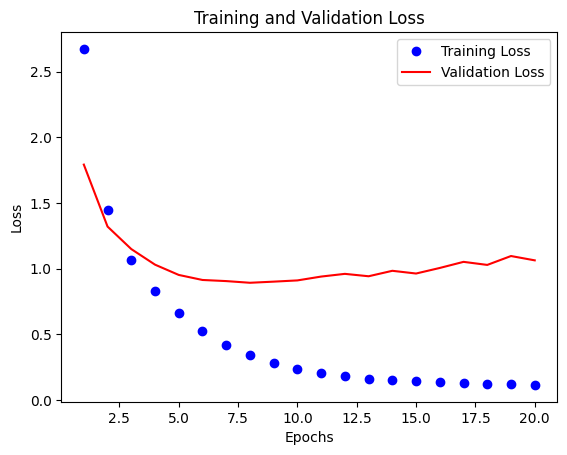

In [24]:
plt.plot(epochs,loss,"bo",label="Training Loss")
plt.plot(epochs,val_loss,"r",label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()